In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import array
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
import tensorflow as tf
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
dataset = dataset.values
dataset = dataset.astype('float32')
dataset[:50]

NameError: name 'dataset' is not defined

In [14]:
np.random.seed(7)

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

NameError: name 'dataset' is not defined

In [9]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

NameError: name 'dataset' is not defined

In [10]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

NameError: name 'train' is not defined

In [11]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


NameError: name 'trainX' is not defined

In [12]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)


NameError: name 'trainX' is not defined

In [13]:
model.save('fileneame.h5')

In [1]:
from keras.models import load_model

model = load_model('lstm_modelCL.h5')
# make predictions
trainPredict = model.predict(trainX, verbose=2)
testPredict = model.predict(testX, verbose=2)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


NameError: name 'trainX' is not defined

2139 1055


In [159]:
# reshape input to be [samples, time steps, features]


Epoch 1/50
 - 4s - loss: 0.0192
Epoch 2/50
 - 2s - loss: 2.3178e-05
Epoch 3/50
 - 2s - loss: 2.7761e-05
Epoch 4/50
 - 2s - loss: 3.5210e-05
Epoch 5/50
 - 2s - loss: 3.4416e-05
Epoch 6/50
 - 2s - loss: 3.5776e-05
Epoch 7/50
 - 2s - loss: 3.3543e-05
Epoch 8/50
 - 2s - loss: 3.3184e-05
Epoch 9/50
 - 2s - loss: 3.0764e-05
Epoch 10/50
 - 2s - loss: 3.3688e-05
Epoch 11/50
 - 2s - loss: 3.2762e-05
Epoch 12/50
 - 2s - loss: 3.5148e-05
Epoch 13/50
 - 2s - loss: 3.0977e-05
Epoch 14/50
 - 2s - loss: 3.4490e-05
Epoch 15/50
 - 2s - loss: 3.1006e-05
Epoch 16/50
 - 2s - loss: 3.1921e-05
Epoch 17/50


KeyboardInterrupt: 

[[22. 28.]
 [49. 64.]]


Train Score: 1.88 RMSE
Test Score: 5.55 RMSE


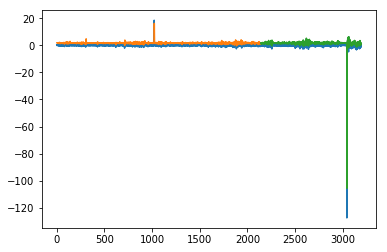

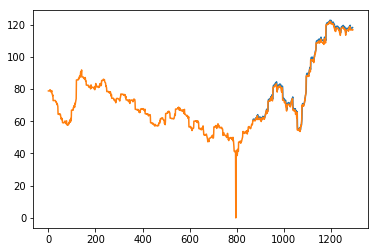

In [139]:
plt.plot(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset))


In [438]:
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.01 RMSE


In [439]:
# # data = array(all_fx)
# # data = data.reshape(1, len(all_fx), 8)

# # shift train predictions for plotting
# trainPredictPlot = np.empty_like(dataset)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(dataset)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

# # shift train predictions for plotting
# trainPredictPlot = np.empty_like(dataset)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(dataset)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

ValueError: could not broadcast input array from shape (1744,1) into shape (1748,1)

In [248]:
# all_fx = all_fx.loc[all_fx['USD/CHF Close'] < 2]
# X = all_fx[['Date', 'USD/CHF Close', 'USD/CAD Close',
#        'EUR/JPY Close', 'AUD/USD Close', 'CHF/JPY Close']]
# y = all_fx[['Date', 'EUR/USD Close']]

In [259]:
# train_size = int(len(X) * 0.66)
# train, test = X[0:train_size], X[train_size:len(X)]
# X_train_df = pd.DataFrame(train)
# X_test_df = pd.DataFrame(test)
# print('Observations: %d' % (len(X)))
# print('Training Observations: %d' % (len(train)))
# print('Testing Observations: %d' % (len(test)))

Observations: 5287
Training Observations: 3489
Testing Observations: 1798


In [36]:
in_size = int(len(y) * 0.66)
train, test = y[0:train_size], y[train_size:len(y)]
y_train_df = pd.DataFrame(train)
y_test_df = pd.DataFrame(test)
print('Observations: %d' % (len(y)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

NameError: name 'y' is not defined

In [260]:
X = X_train_df

In [251]:
y = y_train_df["EUR/USD Close"]
y = array(y)

In [264]:
X = array(X_train)
X = X.reshape(1, len(X_train), 6)

In [226]:
y = array(y_train)
y = y.reshape(1, len(y_train), 2)

ValueError: cannot reshape array of size 8812 into shape (1,)

In [265]:
model = Sequential()
model.add(LSTM(10, input_shape=(4406, 6)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

In [271]:
y.shape

(3489,)

In [276]:
y.reshape(1, 3489, 6)


ValueError: cannot reshape array of size 3489 into shape (1,3489,6)

In [277]:
model.fit(X, y, epochs=30, shuffle=False, verbose=2)

ValueError: Input arrays should have the same number of samples as target arrays. Found 1 input samples and 3489 target samples.

In [175]:
tscv = TimeSeriesSplit(n_splits=1)
for train_index, test_index in tscv.split(X):
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]

ValueError: Cannot have number of folds =6 greater than the number of samples: 1.

In [117]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [123]:
X_train.reshape((len))

NameError: name 'array' is not defined

In [37]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  


compilation time :  0.014036893844604492


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  from ipykernel import kernelapp as app


In [35]:
model.fit(
    X_train,
    y_train,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

NameError: name 'X_train' is not defined

Crude Oil Contract - Univariate

In [151]:
crude_data = pd.read_csv(f"https://s3.amazonaws.com/globefutures/data/CBOE_VX5.csv", usecols=[7])


In [152]:
crude_data[:50]

,Change
0,0.400
1,0.000
2,0.100
3,-0.150
4,0.200
5,0.000
6,0.000
7,-0.175
8,-0.025
9,-0.050


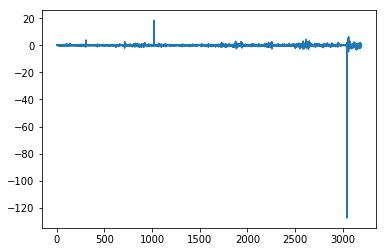

In [153]:
plt.plot(crude_data)

In [154]:
dataset = crude_data.values
dataset = dataset.astype('Float32')


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


In [155]:
np.random.seed(7)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)